In [10]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#load data
perf=pd.read_csv('StudentsPerformance (5).csv') 
perf.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [12]:
plt.savefig('head.png')

<Figure size 432x288 with 0 Axes>

In [13]:
#describe data to find the mean,standard deviation and percentiles
perf.describe()

,math score,reading score,writing score,Total score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [14]:
plt.savefig('Describe.jpg')

<Figure size 432x288 with 0 Axes>

In [15]:
#chance race column name to remove '/'
perf= perf.rename(columns = {"race/ethnicity": "race"})
perf= perf.rename(columns = {"parental level of education": "ParentalEducation"})
perf= perf.rename(columns = {"test preparation course": "TestPreparation"})
perf.head(5)

,gender,race,ParentalEducation,lunch,TestPreparation,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [16]:
#count number of rows and columns in the dataset
perf.shape

(1000, 9)

In [17]:
#count and determine the data types of each column
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender               1000 non-null object
race                 1000 non-null object
ParentalEducation    1000 non-null object
lunch                1000 non-null object
TestPreparation      1000 non-null object
math score           1000 non-null int64
reading score        1000 non-null int64
writing score        1000 non-null int64
Total score          1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


# To determine the number of people that scored above the cut off mark (imagine 250 to be the cut off mark), we plot a cummulative frequency curve

pdf= [0.001 0.005 0.012 0.04  0.124 0.178 0.262 0.21  0.122 0.046]
bin_edges= [ 27.   54.3  81.6 108.9 136.2 163.5 190.8 218.1 245.4 272.7 300. ]
cdf= [0.001 0.006 0.018 0.058 0.182 0.36  0.622 0.832 0.954 1.   ]


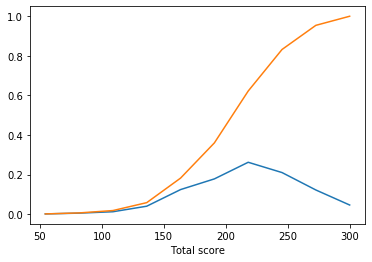

In [18]:
counts, bin_edges=np.histogram(perf['Total score'],bins=10,density=True)
plt.xlabel('Total score')
pdf=counts/(sum(counts))
print('pdf=',pdf);
print('bin_edges=',bin_edges);
cdf=np.cumsum(pdf)
print('cdf=',cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

### This graph shows that about 80% of people got 250 and below. 20% scored above 250

In [19]:
#convert object columns to integer
perf.gender[perf.gender == 'male'] = 1
perf.gender[perf.gender == 'female'] = 2

perf.race[perf.race=='group A']=1
perf.race[perf.race=='group B']=2
perf.race[perf.race=='group C']=3
perf.race[perf.race=='group D']=4
perf.race[perf.race=='group E']=5

perf.ParentalEducation[perf.ParentalEducation=="associate's degree"]=1
perf.ParentalEducation[perf.ParentalEducation=="bachelor's degree"]=2
perf.ParentalEducation[perf.ParentalEducation=="high school"]=3
perf.ParentalEducation[perf.ParentalEducation=="master's degree"]=4
perf.ParentalEducation[perf.ParentalEducation=="some college"]=5
perf.ParentalEducation[perf.ParentalEducation=="some high school"]=6
                                 
perf.lunch[perf.lunch == 'standard'] = 1
perf.lunch[perf.lunch == 'free/reduced'] = 2

perf.TestPreparation[perf.TestPreparation == 'completed'] = 1
perf.TestPreparation[perf.TestPreparation == 'none'] = 0

print(perf)

    gender race ParentalEducation lunch TestPreparation  math score  \
0        2    2                 2     1               0          72   
1        2    3                 5     1               1          69   
2        2    2                 4     1               0          90   
3        1    1                 1     2               0          47   
4        1    3                 5     1               0          76   
..     ...  ...               ...   ...             ...         ...   
995      2    5                 4     1               1          88   
996      1    3                 3     2               0          62   
997      2    3                 3     2               1          59   
998      2    4                 5     1               1          68   
999      2    4                 5     2               0          77   

     reading score  writing score  Total score  
0               72             74          218  
1               90             88          247  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\

In [20]:
perf.dtypes

gender               object
race                 object
ParentalEducation    object
lunch                object
TestPreparation      object
math score            int64
reading score         int64
writing score         int64
Total score           int64
dtype: object

# Univariate analysis

# A. Gender
## To determine how gender affects scores of different sexes, we plot a probability distribution curve

### First, we will know the number of male and females in the data set

In [21]:
perf['gender'].value_counts()

2    518
1    482
Name: gender, dtype: int64

In [22]:
# There are 518 males and 482 females in the dataset

# 1. to determine the probability of a particular gender getting a high math score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


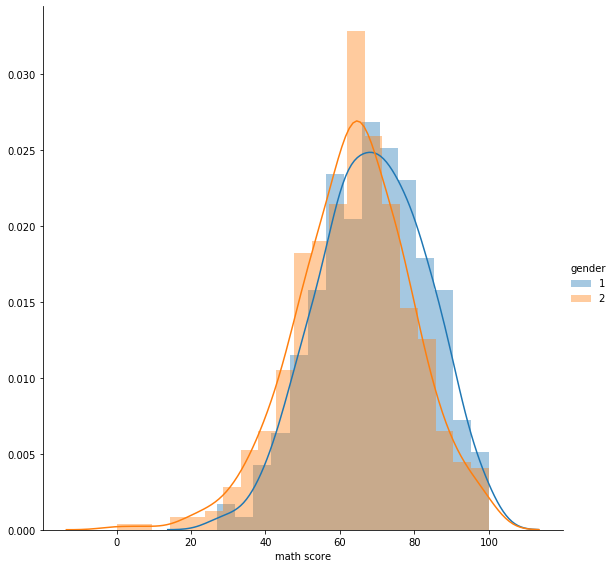

In [23]:
# plot distibution plot for gender against math score
sns.FacetGrid(perf,hue='gender',size=8).map(sns.distplot,'math score').add_legend()

## the above graph shows that the highest female math scores (blue) are between 50 to 90 and the highest male math scores (orange) are between  45 to 80.


# 2. to determine the probability of a particular gender getting a high reading score

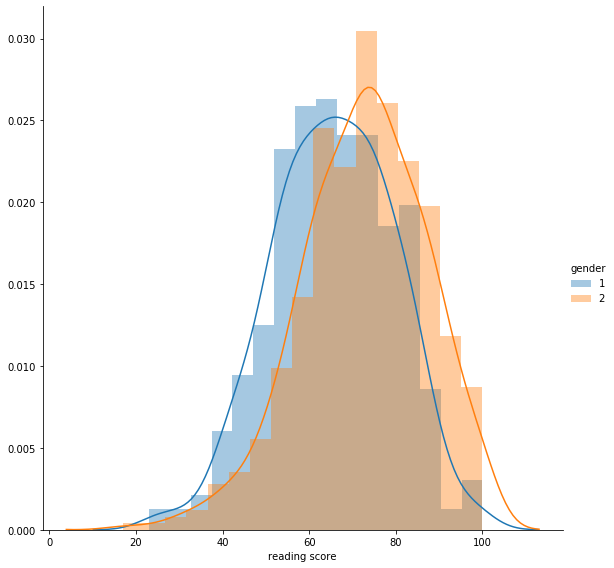

In [24]:
# plot distibution plot for gender against reading score
sns.FacetGrid(perf,hue='gender',size=8).map(sns.distplot,'reading score').add_legend()

## the above graph shows that the highest female reading scores (blue) are between 50 to 80 and the highest male reading scores (orange) are between  60 to 90.


# 3. to determine the probability of a particular gender getting a high writing score

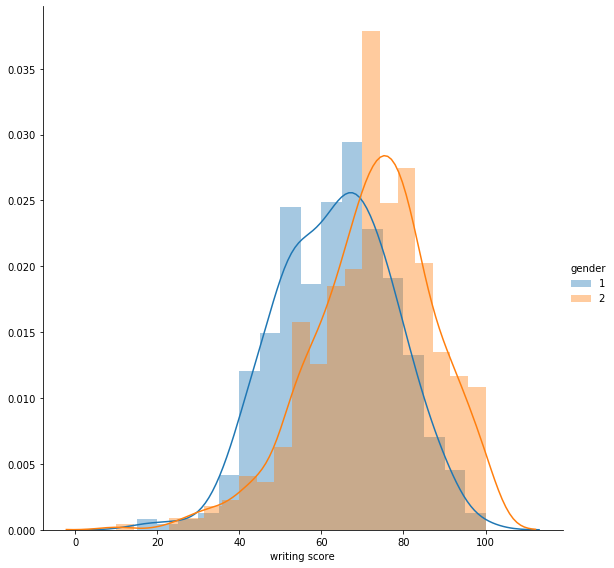

In [25]:
# plot distibution plot for gender against writing score
sns.FacetGrid(perf,hue='gender',size=8).map(sns.distplot,'writing score').add_legend()

## the above graph shows that the highest female writing scores (blue) are between 50 to 80 and the highest male writing scores (orange) are between  60 to 90.


### The three graphs above show that a male is likely to get higher scores in reading and writing than in mathematics while a female is likely to have higher scores in maths.

## B. Using bivariate analysis (boxplot), we can determine the highest and lowest total score 

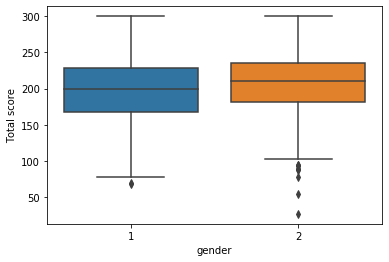

In [26]:
sns.boxplot(x='gender',y='Total score',data=perf)
plt.show()

### This graph shows that the lowest total score for female was about 160 while that for male was about 180. 
### The highest score for female was about 220 and 230 for male

## C. Using multivariate analysis (pairplot), we can determine the relationship between gender and all the scores

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


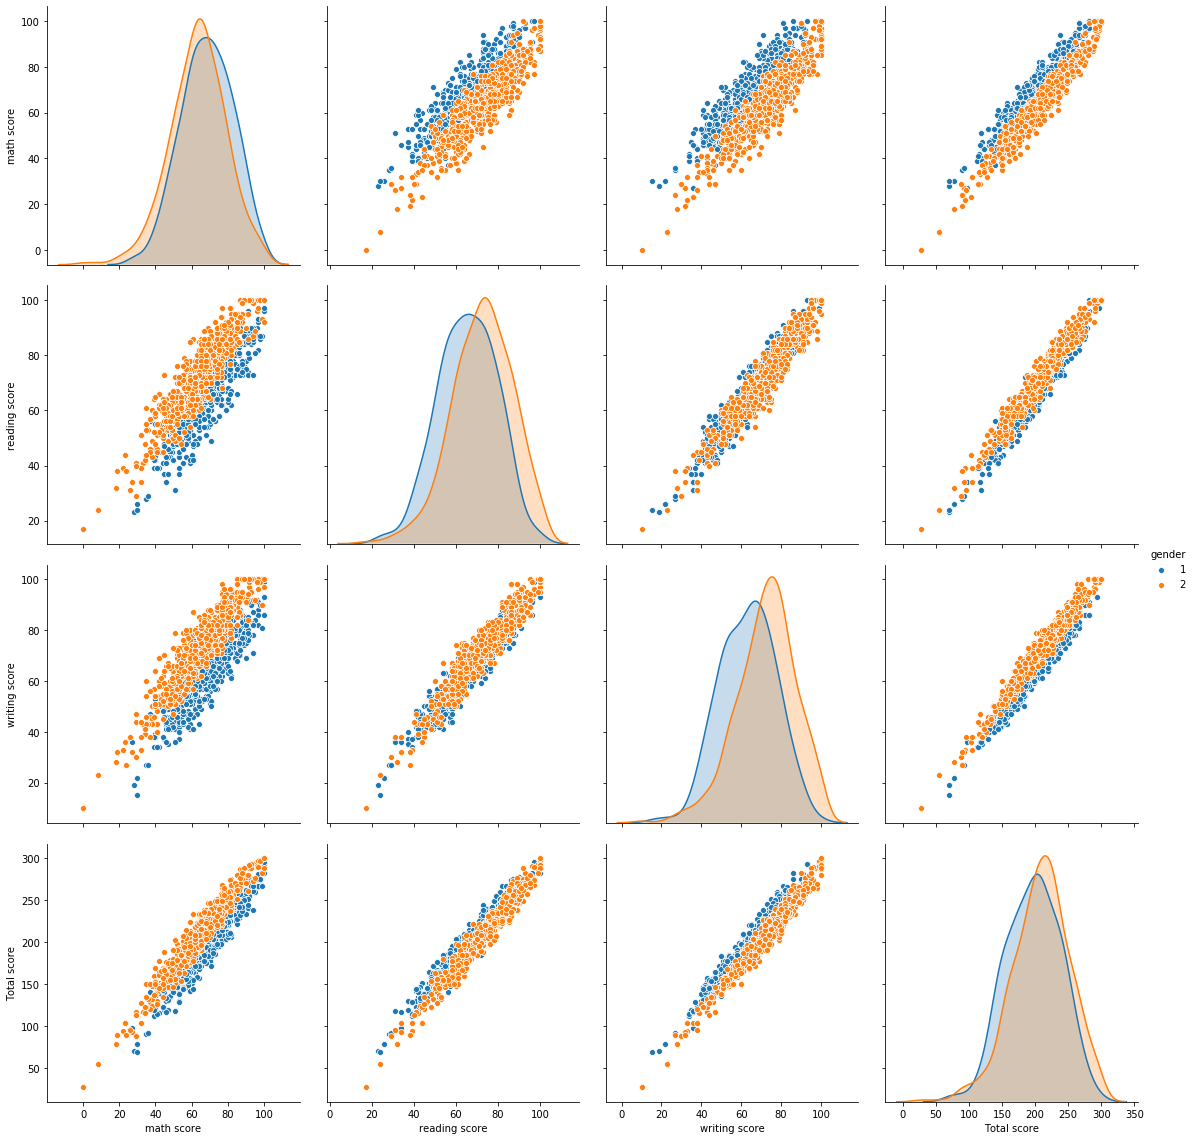

In [27]:
sns.pairplot(perf,vars=['math score','reading score','writing score','Total score'], hue='gender',size=4)
plt.show()

# D. to determine the probability of a each column affecting the total score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


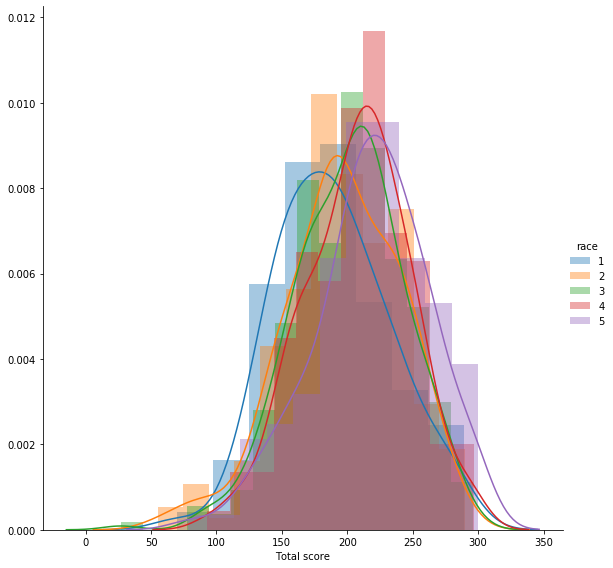

In [28]:
# plot distibution plot for race against total score
sns.FacetGrid(perf,hue='race',size=8).map(sns.distplot,'Total score').add_legend()

## the above graph shows that people in race group D (race 4) are likely to get the highest scores while those in race group A (race 1) are likely to get the lowest scores.


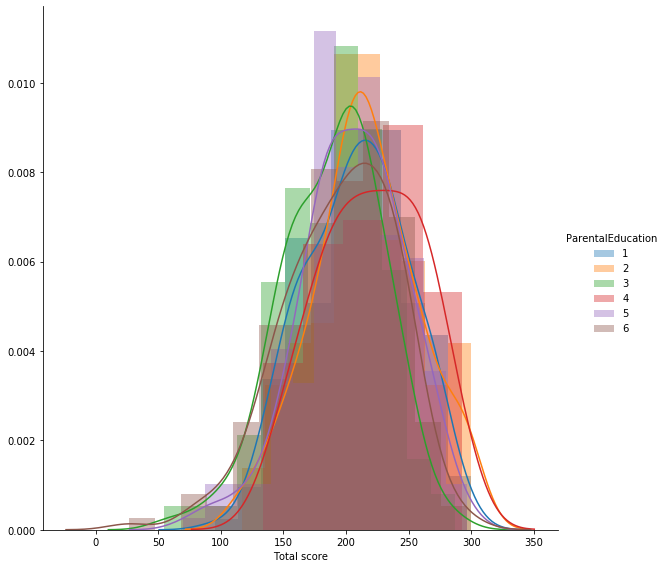

In [29]:
# plot distibution plot for parental level of education against total score
sns.FacetGrid(perf,hue='ParentalEducation',size=8).map(sns.distplot,'Total score').add_legend()

## the above graph shows that people with parents with bachelors degree (orange) are likely to get the highest scores while those with parents with masters degree (red) are likely to get the lowest scores.


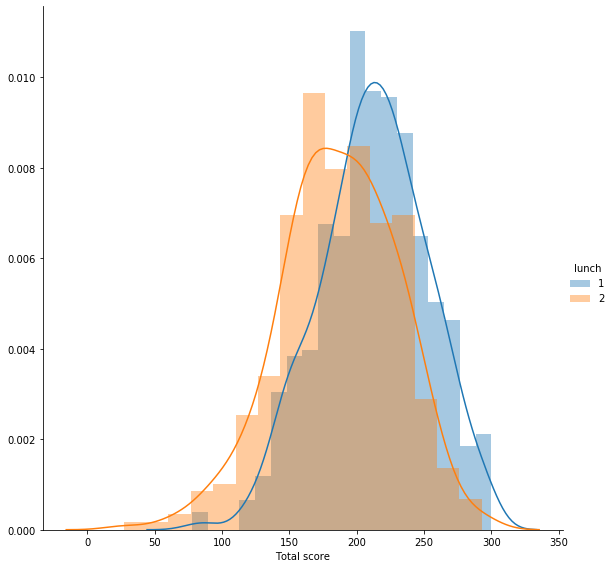

In [30]:
# plot distribution plot for lunch against total score
sns.FacetGrid(perf,hue='lunch',size=8).map(sns.distplot,'Total score').add_legend()

## the above graph shows that people with free/reduced lunch (blue) got higher scores than those with standard lunch (orange)

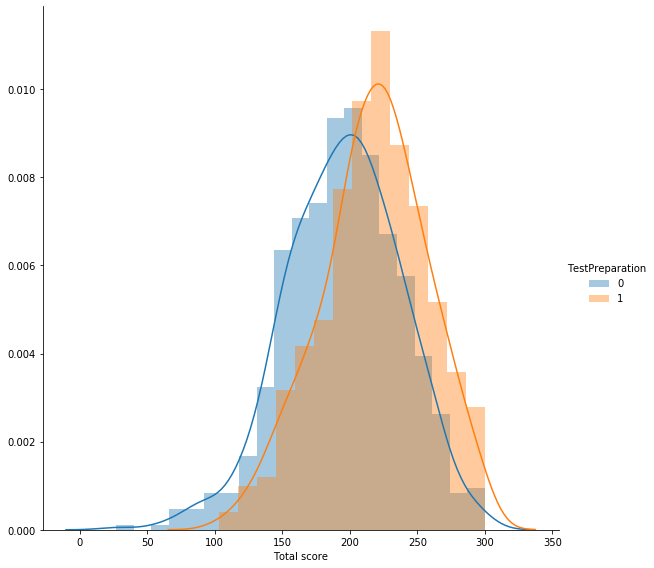

In [31]:
# plot distribution plot for test preparation course against total score
sns.FacetGrid(perf,hue='TestPreparation',size=8).map(sns.distplot,'Total score').add_legend()

## the above graph shows that people that completed the test preparation course (orange) scored more than those who had no preparation course (blue)